In [22]:
from google.colab import files
import zipfile
import os

# Upload the zip file
uploaded = files.upload()

# Extract the zip file
with zipfile.ZipFile("balanced.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

# Confirm structure
os.listdir("dataset")


Saving balanced.zip to balanced (1).zip


['balanced', '__MACOSX']

In [24]:
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split

img_size = 96
X = []
y = []

target_path = "dataset/balanced/target"
non_target_path = "dataset/balanced/non_target"

def load_images(folder, label):
    for filename in sorted(os.listdir(folder)):
        if filename.endswith(".png"):
            img = Image.open(os.path.join(folder, filename)).convert("L").resize((img_size, img_size))
            img_array = np.array(img).astype("float32") / 255.0
            X.append(img_array)
            y.append(label)

load_images(target_path, 1)
load_images(non_target_path, 0)

X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

# Shuffle and split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(" Dataset ready:", X_train.shape, y_train.shape)


 Dataset ready: (17761, 96, 96, 1) (17761,)


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(96, 96, 1)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 94, 94, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 47, 47, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 45, 45, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         991,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 996,161 (3.80 MB)

 Trainable params: 996,161 (3.80 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=10, batch_size=16)


Epoch 1/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 117s 103ms/step - accuracy: 0.9805 - loss: 0.0485 - val_accuracy: 0.9984 - val_loss: 0.0051
Epoch 2/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 141s 102ms/step - accuracy: 0.9981 - loss: 0.0071 - val_accuracy: 0.9923 - val_loss: 0.0163
Epoch 3/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 140s 101ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.9993 - val_loss: 0.0023
Epoch 4/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 150s 108ms/step - accuracy: 0.9992 - loss: 0.0043 - val_accuracy: 0.9998 - val_loss: 0.0047
Epoch 5/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 135s 102ms/step - accuracy: 0.9999 - loss: 8.7490e-04 - val_accuracy: 0.9998 - val_loss: 7.6094e-04
Epoch 6/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 113s 102ms/step - accuracy: 1.0000 - loss: 2.9502e-05 - val_accuracy: 0.9998 - val_loss: 0.0020
Epoch 7/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 140s 100ms/step - accuracy: 1.0000 - loss: 3.3554e-06 - val_accuracy: 0.9998 - val_loss: 0.0020
Epoch 8/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 139s

In [27]:
def representative_dataset():
    for i in range(100):
        yield [X_train[i:i+1].astype(np.float32)]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_quant_model = converter.convert()

with open("hand_detector_model_quant.tflite", "wb") as f:
    f.write(tflite_quant_model)


Saved artifact at '/tmp/tmpmrwyamwj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 96, 96, 1), dtype=tf.float32, name='keras_tensor_45')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132261775777744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132261775778128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132261775780048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132261775780624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132261775778512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132261775781392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132261775780816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132261775782160: TensorSpec(shape=(), dtype=tf.resource, name=None)


/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/convert.py:997: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [28]:
files.download("hand_detector_model.h5")
files.download("hand_detector_model_quant.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
import random
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from google.colab import files

# --- STEP 1: Upload model ---
print("Please upload your quantized model (.tflite)...")
uploaded_model = files.upload()
model_path = list(uploaded_model.keys())[0]

# --- STEP 2: Upload image for prediction ---
print("Please upload an image for prediction (.png or .jpg)...")
uploaded_image = files.upload()
image_path = list(uploaded_image.keys())[0]

# --- STEP 3: Load and preprocess image ---
img = Image.open(image_path).convert('L').resize((96, 96))
img_array = np.array(img, dtype=np.float32).reshape(1, 96, 96, 1) / 255.0  # Normalize to 0-1
img_array = (img_array - 0.5) * 2  # Scale to -1 to 1
img_array = (img_array * 127).astype(np.int8)  # Quantize to int8


# --- STEP 4: Load the model and run inference ---
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Model Loaded!")
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])

interpreter.set_tensor(input_details[0]['index'], img_array)
interpreter.invoke()

output = interpreter.get_tensor(output_details[0]['index'])
score = int(output[0][0])  # output[0] for single output models and score = int(output[0][0]) for multi-output models

# --- STEP 5: Output prediction ---
print(" Raw Output:", output)
if score > 0:
    print("Hand Detected!")
else:
    print("No Hand Detected.")

Please upload your quantized model (.tflite)...


Saving hand_detector_model_quant.tflite to hand_detector_model_quant (8).tflite
Please upload an image for prediction (.png or .jpg)...


Saving hand_999.png to hand_999 (1).png
Model Loaded!
Input Shape: [ 1 96 96  1]
Input Type: <class 'numpy.int8'>
🧪 Raw Output: [[127]]
Hand Detected!


In [38]:
import numpy as np
import tensorflow as tf
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

# --- STEP 1: Upload quantized model ---
print(" Upload your quantized .tflite model:")
uploaded_model = files.upload()
model_path = list(uploaded_model.keys())[0]





 Upload your quantized .tflite model:


Saving hand_detector_model_quant.tflite to hand_detector_model_quant (11).tflite


 Upload the 96x96 grayscale image from Arduino (e.g., 'captured_hand.png'):


Saving hand_8223.png to hand_8223.png


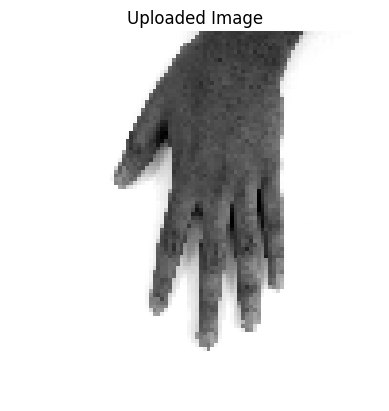


 Model Output: [[127]]
 Hand Detected


In [39]:
# --- STEP 2: Upload image from Arduino ---
print(" Upload the 96x96 grayscale image from Arduino (e.g., 'captured_hand.png'):")
uploaded_image = files.upload()
image_path = list(uploaded_image.keys())[0]

# --- STEP 3: Load and preprocess image ---
img = Image.open(image_path).convert('L').resize((96, 96))
img_array = np.array(img, dtype=np.float32).reshape(1, 96, 96, 1) / 255.0
img_array = (img_array - 0.5) * 2  # Scale to [-1, 1]
img_array = (img_array * 127).astype(np.int8)  # Convert to int8

# Show the image
plt.imshow(img, cmap='gray')
plt.title("Uploaded Image")
plt.axis('off')
plt.show()

# --- STEP 4: Run TFLite inference ---
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.set_tensor(input_details[0]['index'], img_array)
interpreter.invoke()
output = interpreter.get_tensor(output_details[0]['index'])

score = int(output[0][0])

# --- STEP 5: Output result ---
print("\n Model Output:", output)
if score > 0:
    print(" Hand Detected")
else:
    print(" No Hand Detected")



 Upload  image (96x96 grayscale PNG or JPG):


Saving non_target_931_aug_3.png to non_target_931_aug_3.png

🔍 Predicting for: non_target_931_aug_3.png


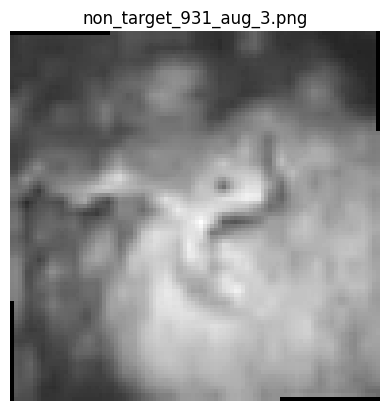

Raw Output: [[-128]]
❌ No Hand Detected


In [44]:

print("\n Upload  image (96x96 grayscale PNG or JPG):")
uploaded_images = files.upload()
image_paths = list(uploaded_images.keys())

# --- STEP 3: Process and run inference on each image ---
for image_path in image_paths:
    print(f"\n🔍 Predicting for: {image_path}")

    # Load image
    img = Image.open(image_path).convert('L').resize((96, 96))
    img_array = np.array(img, dtype=np.float32).reshape(1, 96, 96, 1) / 255.0
    img_array = (img_array - 0.5) * 2  # Scale to [-1, 1]
    img_array = (img_array * 127).astype(np.int8)  # Convert to int8

    # Show the image
    plt.imshow(img, cmap='gray')
    plt.title(f"{image_path}")
    plt.axis('off')
    plt.show()

    # Run inference
    interpreter.set_tensor(input_details[0]['index'], img_array)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])

    score = int(output[0][0])
    print("Raw Output:", output)
    if score > 0:
        print("🖐️ Hand Detected")
    else:
        print("❌ No Hand Detected")
